In [1]:
#import libraries
import pandas as pd
import numpy as np
import itertools
import networkx as nx
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
pd.options.mode.chained_assignment = None 
sns.set(font='Times New Roman')
sns.set(font_scale=1.5)
import matplotlib.pyplot 
import Bio
#Neighbour Join Tree
import pandas as pd
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
import matplotlib.pyplot as plt
import Bio.Phylo as Phylo
import os

In [2]:
#this data contains data for North America not only USA
df_weekly_sum = pd.read_csv('omicron_sublineages_cleaned_USA.csv')
print(df_weekly_sum)

   pango_lin                   week  freq
0       BA.1  2021-11-01/2021-11-07     6
1       BA.1  2021-11-08/2021-11-14    10
2       BA.1  2021-11-15/2021-11-21    10
3       BA.1  2021-11-22/2021-11-28   102
4       BA.1  2021-11-29/2021-12-05  1977
..       ...                    ...   ...
95      BA.5  2022-05-16/2022-05-22   810
96      BA.5  2022-05-23/2022-05-29  1111
97      BA.5  2022-05-30/2022-06-05   834
98      BA.5  2022-06-06/2022-06-12   155
99      BA.5  2022-06-13/2022-06-19     1

[100 rows x 3 columns]


In [3]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Filter the data for BA.1 pango_lin
# ba1_data = df_weekly_sum[df_weekly_sum['pango_lin'] == 'BA.1']

# # Convert the 'week' column to datetime for plotting
# ba1_data['week'] = pd.to_datetime(ba1_data['week'], format='%Y-%m-%d/%Y-%m-%d')

# # Sort the data by week
# ba1_data = ba1_data.sort_values('week')

# plt.plot(ba1_data['week'], ba1_data['freq'])

# plt.xlabel('Week')
# plt.ylabel('Frequency')
# plt.title('Frequency of BA.1 Pango Lin over Time')
# plt.xticks(rotation=45)
# plt.show()

In [4]:
import pandas as pd
import numpy as np

def create_distance_matrix(df, quarter_continent, variant_choice_set):
    clade_list = set()
    for variant in df['pango_lin']:
        clades = variant.split(' vs ')
        clade_list.update(clades)
#         print(clade_list)

    
    clade_list = sorted(clade_list)
    clade_list = [variant for variant in clade_list if variant in variant_choice_set] #
    distance_matrix = pd.DataFrame(index=clade_list, columns=clade_list)
    
    distance_matrix.fillna(0, inplace=True)

    for i in clade_list:
        for j in clade_list:
            if i != j:
                variant_1 = f"{i} vs {j}"
                variant_2 = f"{j} vs {i}"
                slope_1 = df.loc[df['pango_lin'] == variant_1, 'Slope']
                slope_2 = df.loc[df['pango_lin'] == variant_2, 'Slope']
                slope = slope_1.iloc[0] if not slope_1.empty else slope_2.iloc[0]
                distance_matrix.loc[i, j] = abs(slope)
                distance_matrix.loc[j, i] = abs(slope)  # Add this line to ensure symmetry

    return distance_matrix


In [5]:
#clades contains all GISAID clades, VOC contains GISAID clades containing VOCs
#change clade input to whichever you want to analyze
# clades = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron','Epsilon','Lambda','Iota','Kappa','Mu','Eta','Zeta','Theta']
# # VOC = ['Delta', 'Omicron']
# VOC = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron']
pango_list = ['BA.1','BA.2', 'BA.3', 'BA.4', 'BA.5']
clade_input = pango_list    ####

#original distance matrix code
#function to generate distance matrix based on quarter, year, and continent
# def create_distance_matrix(df,quarter_continent):
#     tmp = df['Variant'].str.split('vs', expand=True)
#     clade_list = tmp[0].unique()
#     distance_matrix = pd.DataFrame(index = clade_list)
#     distance_matrix[clade_list] = np.nan
#     #fill in distance matrix
#     for i in clade_list:
#         for j in clade_list:
#             if i == j:
#                 distance_matrix.loc[i,j] = 0
#             else:
#                 distance_matrix.loc[i,j] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j),
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#                 distance_matrix.loc[j,i] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#     return distance_matrix

#original difference matrix code
# #function to generate difference matrix based on quarter, year, and continent
# def create_difference_matrix(df,quarter_continent):
#     tmp = df['pango_lin'].str.split('vs', expand=True)
#     clade_list = tmp[0].unique()
# #     clade_list = df_weekly_sum('pango_lin').unique()
#     difference_matrix = pd.DataFrame(index = clade_list)
#     difference_matrix[clade_list] = np.nan
#     #fill in difference matrix
#     for i in clade_list:
#         for j in clade_list:
#             if i == j:
#                 difference_matrix.loc[i,j] = 0
#             else:
#                 difference_matrix.loc[i,j] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#                 difference_matrix.loc[j,i] = (abs((df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#     #if row_vs_col is a negative value, make it negative in difference matrix
#     for i,v in difference_matrix.iterrows():
#         for j in difference_matrix:
#             if i != j:
#                 if (df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
#                     difference_matrix.loc[i,j] *= -1
#     return difference_matrix

#updated difference matrix code
# def create_difference_matrix(df, quarter_continent, variant_choice_set):
#     clade_list = set()
#     for variant in df['pango_lin']:
#         clades = variant.split(' vs ')
#         clade_list.update(clades)
# #         print(clade_list)

    
#     clade_list = sorted(clade_list)
#     clade_list = [variant for variant in clade_list if variant in variant_choice_set] #
#     difference_matrix = pd.DataFrame(index=clade_list, columns=clade_list)
    
#     difference_matrix.fillna(0, inplace=True)

#     for i in clade_list:
#         for j in clade_list:
#             if i != j:
#                 variant_1 = f"{i} vs {j}"
#                 variant_2 = f"{j} vs {i}"
#                 slope_1 = df.loc[df['pango_lin'] == variant_1, 'Slope']
#                 slope_2 = df.loc[df['pango_lin'] == variant_2, 'Slope']
#                 slope = slope_1.iloc[0] if not slope_1.empty else slope_2.iloc[0]
#                 difference_matrix.loc[i, j] = abs(slope)
#                 difference_matrix.loc[j, i] = abs(slope)  # Add this line to ensure symmetry
                
#     #if row_vs_col is a negative value, make it negative in difference matrix
#     for i,v in difference_matrix.iterrows():
#         for j in difference_matrix:
#             if i != j:
#                 if (df.loc[df['pango_lin'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
#                     difference_matrix.loc[i,j] *= -1

#     return difference_matrix

# #function to calculate the log transformed ratio of two clades
# def transform_ratio(clade_1, clade_2):
#     return np.log10(clade_1/clade_2)

def transform_ratio(clade_1, clade_2):
    clade_1 = np.where(clade_1 <= 0, np.nan, clade_1) #negative values are replaced with zeroes as the log of zero returns math error
    clade_2 = np.where(clade_2 <= 0, np.nan, clade_2)
    return clade_1 / clade_2

def time_frame(df, start_date, end_date):  #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
    print(time_window)
    dataframe = df.loc[df['Collection date'].isin(time_window)]
#     print(f"dataframe after time window:\n {dataframe.head()}")
    dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
    for i in dataframe.columns.tolist():
        if dataframe[i].isnull().all():
            dataframe = dataframe.drop(i, axis=1)
#     print(f"dataframe:\n {dataframe}")
    return dataframe



# def time_frame_no_cumsum(df,time_window):
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     return dataframe

def time_frame_no_cumsum(df,start_date, end_date): #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
    print(time_window)
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    return dataframe

#function returns slope of clade advantage plots
def slope_calc(day, pairwise_fitness):
    par = np.polyfit(day, pairwise_fitness, 1, full = True)
    slope= par[0][0]
    return slope

def clade_comparisons(df):
    clade_list = [i for i in clade_input if i in df.columns.tolist()]

    df['date_ordinal'] = pd.to_datetime(df['week']).apply(lambda date: date.toordinal())
    df['days'] = df['date_ordinal'] - 737425
    #calculate log ratio for each clade comparison
    for i in clade_list:
        for j in clade_list:
            if i != j:
                df['{a} vs {b}'.format(a=i,b=j)] = df.apply(lambda row : 
                                                                        transform_ratio(row['{a}'.format(a=i)],
                                                                                        row['{b}'.format(b=j)]),
                                                                                        axis = 1)
    clade_list.append('date_ordinal')
    df = df.drop(clade_list, axis=1)
    return df

In [6]:
# This function finds the distance matrix among all the clades 

def automation_mine(country, dataset, start, end, variant_choice_set):
    
#     df_weekly = dataset[dataset['Location'] == country]
    df_weekly = dataset
    

    #pivot dataframe so that index is date and columns are clades
    df_weekly = df_weekly.pivot(index = 'week', columns = 'pango_lin', values = 'freq')
    df_weekly = df_weekly.reset_index()
    

    df_weekly['Collection date'] = np.random.randint(1,6,df_weekly.shape[0])

    #split date column so we can retrieve month and year
    tmp = df_weekly['week'].str.rsplit('-',n=3, expand = True)
    tmp.columns = ['0','1','2','3']
#     print(f"tmp: \n {tmp}")
    #collection date column contains month and year of each week 
    df_weekly['Collection date'] = tmp['0']
#     print(f"df_weekly1 :\n{df_weekly.head()}")
    cols = df_weekly.columns.tolist()
    cols = cols[0:1] + cols[-1:] + cols[1:-1]
    df_weekly = df_weekly[cols]
#     print(f"df_weekly2 :\n {df_weekly.head}")
#     print(f"df_weekly3 :\n {df_weekly.columns}")
           
    #specify time frame to analyze
    df_sum = time_frame(df_weekly, start, end)
    # df_sum.to_csv(country+"df_sum"+r'.csv')
#     print(f"df_sum:\n {df_sum}")
    
# #     check the difference daily counts for each subvariants to choose the important time window
#     columns = ['BA.1', 'BA.2', 'BA.3', 'BA.4', 'BA.5']
#     for col in columns:
#         df_sum[col + '_diff'] = df_sum[col].diff()
#     print(df_sum)

    #calculate log comparisons at each week
    df_ = clade_comparisons(df_sum)
#     print(f"clade comparison:\n {df_}")
    # df_.to_csv(country+'_clade_comparison')
#     df_['days'] -= df_['days'].iloc[0]
# #     print(f"df_ :\n {df_}")
# #     print(f"df_ :\n {df_.columns}")
    

#     #calculate slopes, have to disregard nans
#     df_slopes = pd.DataFrame()
#     cols = df_.columns.to_list()
#     df_slopes['pango_lin'] = cols[3:]
# #     print(f"df_slopes1:\n {df_slopes}")
# #     print(df_slopes['Variant'])
#     slopes = []
#     for i,v in enumerate(df_.iloc[:,3:]):
#         tmp = df_[~df_.iloc[:,i+3].isnull()]
#         tmp['pseudo_time'] = np.array(range(0, tmp.shape[0] ))*7
# #         print(tmp)
#         slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp.iloc[0:len(tmp),i+3]))
#         #print(len(slopes))
# #     print(f"df_slopes2:\n {df_slopes}")
#     df_slopes['Slope'] = slopes
#     # df_slopes.to_csv(country+"_slope_WHO"+r'.csv')
#     df_slopes = pd.DataFrame(df_slopes)
# #     print(df_slopes)

#**********************************************************************************************************************
    ''''this code snippet solves the linreg error
        after updating the code only the notnull values of the variant choice set variants are 
        chosen. Other column are not influencing.
    '''
    #Make the combinations of the variant choice set
    combinations = []

    # Append 'Omicron vs Delta'
    combination1 = ' vs '.join(variant_choice_set)
    combinations.append(combination1)

    # Append 'Delta vs Omicron'
    combination2 = ' vs '.join(sorted(list(variant_choice_set), reverse=True))
    combinations.append(combination2)
    

    #calculate slopes, have to disregard nans
    df_slopes = pd.DataFrame()
    cols = df_.columns.to_list()
#     print(f"df_ columns : {cols}")
    df_slopes['pango_lin'] = cols[3:]
#     print(f"df_slopes:\n {df_slopes}")
    slopes = []
    for i,v in enumerate(df_.iloc[:,3:]):
#         tmp = df_[~df_.iloc[:,i+3].isnull()] ##issue (it chooses columns using the index)
        tmp = df_[df_.loc[:, df_.columns.isin(combinations)].notnull().any(axis=1)] #it chooses the columns that are given in the variant_choice set
        tmp['pseudo_time'] = np.array(range(0, tmp.shape[0] ))*7
#         print(f"tmp :\n {tmp}")
        slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp.iloc[0:len(tmp),i+3]))
#         slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp[v])) 
        #print(len(slopes))
#         print(df_slopes)
#     print(f"tmp :\n {tmp}")
#     print(f"Slopes: {slopes}")
    df_slopes['Slope'] = slopes
#     print(df_slopes)
    df_slopes = pd.DataFrame(df_slopes)   #changed
    # df_slopes.to_csv(country+"_slope_WHO"+r'.csv')
#     print(f"Slope :\n {df_slopes}")
    
#     dist_mat = create_distance_matrix(df_slopes,'Slope')
#     # dist_mat.to_csv(country+"_dist_mat_WHO"+r'.csv')
#     print(f"distance matrix :\n {dist_mat}")
#*******************************************************************************************************************************************************

    dist_mat = create_distance_matrix(df_slopes, 'Slope', variant_choice_set)
#     dist_mat.to_csv(file_path, index=True)
    print(f"Diatance matrix: \n {dist_mat}")
    
    dist_mat = create_distance_matrix(df_slopes, 'Slope', variant_choice_set)
    file_name = f"{country}_{start}_{end}_omicron_sublineage_dist_mat_{combination1}.csv"
    directory = "/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    file_path = os.path.join(directory, file_name)
    dist_mat.to_csv(file_path, index=True)
    if os.path.isfile(file_path):
        print(f"Distance matrix saved at: {file_path}")
    else:
        print("Error: Failed to save the distance matrix.")

#**********************************************************not needed for this analysis***********************************
#     # Specify the directory path
#     directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_vs_delta_regression_plots/"

#     # Create the directory if it doesn't exist
#     if not os.path.exists(directory):
#         os.makedirs(directory)
    
#     dif_mat = create_difference_matrix(df_slopes,'Slope')
#     # dif_mat.to_csv(country+"_dif_mat_WHO"+r'.csv')
#     # print(f"difference matrix :\n {dif_mat}")

#     #Plot distance matrix as clustermap
#     sns.set(rc = {'figure.figsize':(10, 20)}, font_scale = 1.8)

#     #create distance array from distance matrix
#     distance_array = ssd.squareform(dist_mat) 

#     #create linkage object
#     distance_linkage = hierarchy.linkage(distance_array)
#     print(distance_array.shape)
#     print(dist_mat.shape)

#     #display clustermap
#     g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
#                         cmap = 'coolwarm',vmin=-.023,vmax=0.023, cbar_pos=(0.971, 0.087, .03, 0.7))                     
#     # g.fig.set_size_inches(10, 10)
#     # plt.savefig(country+"_clustermap_WHO"+'.jpg', dpi = 300, bbox_inches='tight')
#     return g

In [7]:
automation_mine('North America', df_weekly_sum, start='2022-03', end='2022-04', variant_choice_set={'BA.1', 'BA.2'})

['2022-03', '2022-04']
Diatance matrix: 
           BA.1      BA.2
BA.1  0.000000  0.072489
BA.2  0.072489  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/North America_2022-03_2022-04_omicron_sublineage_dist_mat_BA.2 vs BA.1.csv


In [8]:
# #automation function finds the diatance matrix
automation_mine('North America', df_weekly_sum, start = '2022-04', end = '2022-05', variant_choice_set= {'BA.2','BA.4'})

['2022-04', '2022-05']
Diatance matrix: 
          BA.2     BA.4
BA.2  0.00000  0.00019
BA.4  0.00019  0.00000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/North America_2022-04_2022-05_omicron_sublineage_dist_mat_BA.4 vs BA.2.csv


In [9]:
# #automation function finds the diatance matrix
automation_mine('North America', df_weekly_sum, start = '2022-04', end = '2022-05', variant_choice_set= {'BA.4','BA.5'})

['2022-04', '2022-05']
Diatance matrix: 
           BA.4      BA.5
BA.4  0.000000  0.019194
BA.5  0.019194  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/North America_2022-04_2022-05_omicron_sublineage_dist_mat_BA.5 vs BA.4.csv


In [10]:
BA1_BA2 = pd.read_csv('/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/North America_2022-03_2022-04_omicron_sublineage_dist_mat_BA.2 vs BA.1.csv', index_col=0)
BA1_BA2

,BA.1,BA.2
BA.1,0.000000,0.072489
BA.2,0.072489,0.000000


In [11]:
BA2_BA4 = pd.read_csv('/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/North America_2022-04_2022-05_omicron_sublineage_dist_mat_BA.2 vs BA.4.csv', index_col=0)
BA2_BA4

,BA.2,BA.4
BA.2,0.00000,0.00019
BA.4,0.00019,0.00000


In [12]:
BA4_BA5 = pd.read_csv('/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/North America_2022-04_2022-05_omicron_sublineage_dist_mat_BA.5 vs BA.4.csv', index_col=0)
BA4_BA5

,BA.4,BA.5
BA.4,0.000000,0.019194
BA.5,0.019194,0.000000


In [13]:
clade_list = ['BA.1', 'BA.2', 'BA.4', 'BA.5']
clade_list = sorted(clade_list)
distance_matrix = pd.DataFrame(index=clade_list, columns=clade_list)
distance_matrix.fillna(0, inplace=True)
print(distance_matrix)

      BA.1  BA.2  BA.4  BA.5
BA.1     0     0     0     0
BA.2     0     0     0     0
BA.4     0     0     0     0
BA.5     0     0     0     0


In [14]:
distance_matrix.iloc[0:2, 0:2] = BA1_BA2
distance_matrix.iloc[1:3, 1:3] = BA2_BA4
distance_matrix.iloc[2:4, 2:4] = BA4_BA5
print(distance_matrix)
print(type(distance_matrix))

          BA.1      BA.2      BA.4      BA.5
BA.1  0.000000  0.072489  0.000000  0.000000
BA.2  0.072489  0.000000  0.000190  0.000000
BA.4  0.000000  0.000190  0.000000  0.019194
BA.5  0.000000  0.000000  0.019194  0.000000
<class 'pandas.core.frame.DataFrame'>


In [15]:
def plot_progressive_fitness(clade_list, df1, df2, df3, location): #pass dataframe in a sorted order
    # create an empty dataframe
    clade_list = sorted(clade_list)
    distance_matrix = pd.DataFrame(index=clade_list, columns=clade_list)
    distance_matrix.fillna(0, inplace=True)
    
    # assign values to the empty dataframe
    distance_matrix.iloc[0:2, 0:2] = pd.DataFrame(df1)
    distance_matrix.iloc[1:3, 1:3] = pd.DataFrame(df2)
    distance_matrix.iloc[2:4, 2:4] = pd.DataFrame(df3)
    
    distance_matrix.iloc[0,2] = distance_matrix.iloc[0,1] + distance_matrix.iloc[1,2]
    distance_matrix.iloc[0,3] = distance_matrix.iloc[0,2] + distance_matrix.iloc[3,2]
    distance_matrix.iloc[1,3] = distance_matrix.iloc[1,2] + distance_matrix.iloc[2,3]
    distance_matrix.iloc[2,0] = distance_matrix.iloc[0,2] 
    distance_matrix.iloc[3,0] = distance_matrix.iloc[0,3] 
    distance_matrix.iloc[3,1] = distance_matrix.iloc[1,3] 

    # Set the index of the dataframe to the first column
    distance_matrix.set_index(distance_matrix.columns, inplace=True)
    print(f"Distance matrix:\n {distance_matrix}")
    

    #export the combined distance matrix
    #export the distance matrix
    # Specify the directory path
    directory = "/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the figure to the specified directory with DPI set to 300
    filename = os.path.join(directory, location + "_combined_distance_matrix_for_omicron_sublineages.csv")
    distance_matrix.to_csv(filename, index=False)
    
    
    # Create a step plot
    plt.figure(figsize=(3, 3))  # Set figure size to 3 by 3
    plt.step(distance_matrix.index, distance_matrix.values[0], linewidth=1.5, color='red')

    # Add labels and title
#     plt.xlabel('Sub-lineages', fontsize=12)
    plt.ylabel('Fitness Value', fontsize=12)
    plt.title(f'Progressive fitness growth of Omicron Sub-lineages\n Location: {location}', fontsize=8)

    # Set the background color to white
    plt.gca().set_facecolor('white')

    # Add axis lines
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(-0.1, color='black', linewidth=0.5)

    # Rotate x-axis labels
#     plt.xticks(rotation=90)
    plt.xticks([])
    plt.yticks()
    
    # Display the labels on the graph
    categories = ['BA.1', 'BA.2', 'BA.4', 'BA.5']
    x = range(len(categories))
    values = distance_matrix.values[0][0:5]
    print(values)
    for i in range(len(categories)):
        plt.text(x[i], values[i], f'{categories[i]}', ha='left', va='bottom')

    # Specify the directory path
    directory = "/scr/mjpantho/Pantho_differential_fitness/figures_for_step_plot/"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the figure to the specified directory with DPI set to 300
    filename = os.path.join(directory, location + "_omicron_sublineage_step_plot.png")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    
    # Show the plot
    plt.show()


Distance matrix:
           BA.1      BA.2      BA.4      BA.5
BA.1  0.000000  0.072489  0.072679  0.091872
BA.2  0.072489  0.000000  0.000190  0.019384
BA.4  0.072679  0.000190  0.000000  0.019194
BA.5  0.091872  0.019384  0.019194  0.000000
[0.         0.07248879 0.07267858 0.09187242]


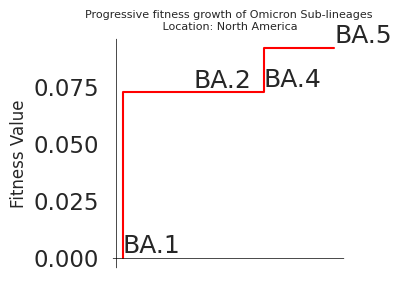

""


In [16]:
combined_distance_matrix = pd.DataFrame(plot_progressive_fitness(['BA.1', 'BA.2', 'BA.4', 'BA.5'], BA1_BA2, BA2_BA4, BA4_BA5, 'North America'))
combined_distance_matrix

## NJ tree for Omicron Sub-lineages

In [46]:
import pandas as pd
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
import matplotlib.pyplot as plt
import Bio.Phylo as Phylo

def create_nj_tree(filepath, location):
    # Read the distance matrix from the CSV file
    df = pd.read_csv(filepath)

    # Set the index of the dataframe to the first column
    df.set_index(df.columns, inplace=True)
    print(df)
    # Create a list of row names as strings
    names = df.index.astype(str).tolist()

    # Generate the lower triangle distance matrix
    distance_matrix = []
    for i in range(len(df)):
        row = []
        for j in range(i+1):
            row.append(round(df.iloc[i][j], 9))
        distance_matrix.append(row)

    # Create a DistanceMatrix object
    dm = DistanceMatrix(names, distance_matrix)
    print(dm)
    # Construct the tree
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    tree.ladderize()
    Phylo.draw_ascii(tree)

    # Add branch lengths to the tree
    for clade in tree.find_clades():
        if clade.branch_length is None:
            clade.branch_length = 0.0
        clade.branch_length = round(clade.branch_length, 6)

    # Draw the tree with labels
    fig = plt.figure(figsize=(6, 6), dpi=500)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, branch_labels=lambda c: c.branch_length)
    
    # Adjust label placement
    plt.tight_layout()
    plt.show()

    # Save the figure to a file
    directory = "/scr/mjpantho/Pantho_differential_fitness/nj_tree_plots"

    # Create the directory if it doesn't exist
    os.makedirs(directory, exist_ok=True)

    # Save the figure to the specified directory with DPI set to 300
    filename = os.path.join(directory, location + "_omicron_sublineages_nj_tree.png")
    fig.savefig(filename, dpi=300, bbox_inches="tight")

    plt.close(fig)


          BA.1      BA.2      BA.4      BA.5
BA.1  0.000000  0.072489  0.072679  0.091872
BA.2  0.072489  0.000000  0.000190  0.019384
BA.4  0.072679  0.000190  0.000000  0.019194
BA.5  0.091872  0.019384  0.019194  0.000000
BA.1	0
BA.2	0.07248879	0
BA.4	0.072678581	0.000189792	0
BA.5	0.091872418	0.019383629	0.019193837	0
	BA.1	BA.2	BA.4	BA.5
 , BA.4
 |
_|__________________ BA.5
 |
 |________________________________________________________________________ BA.1
 |
 | BA.2



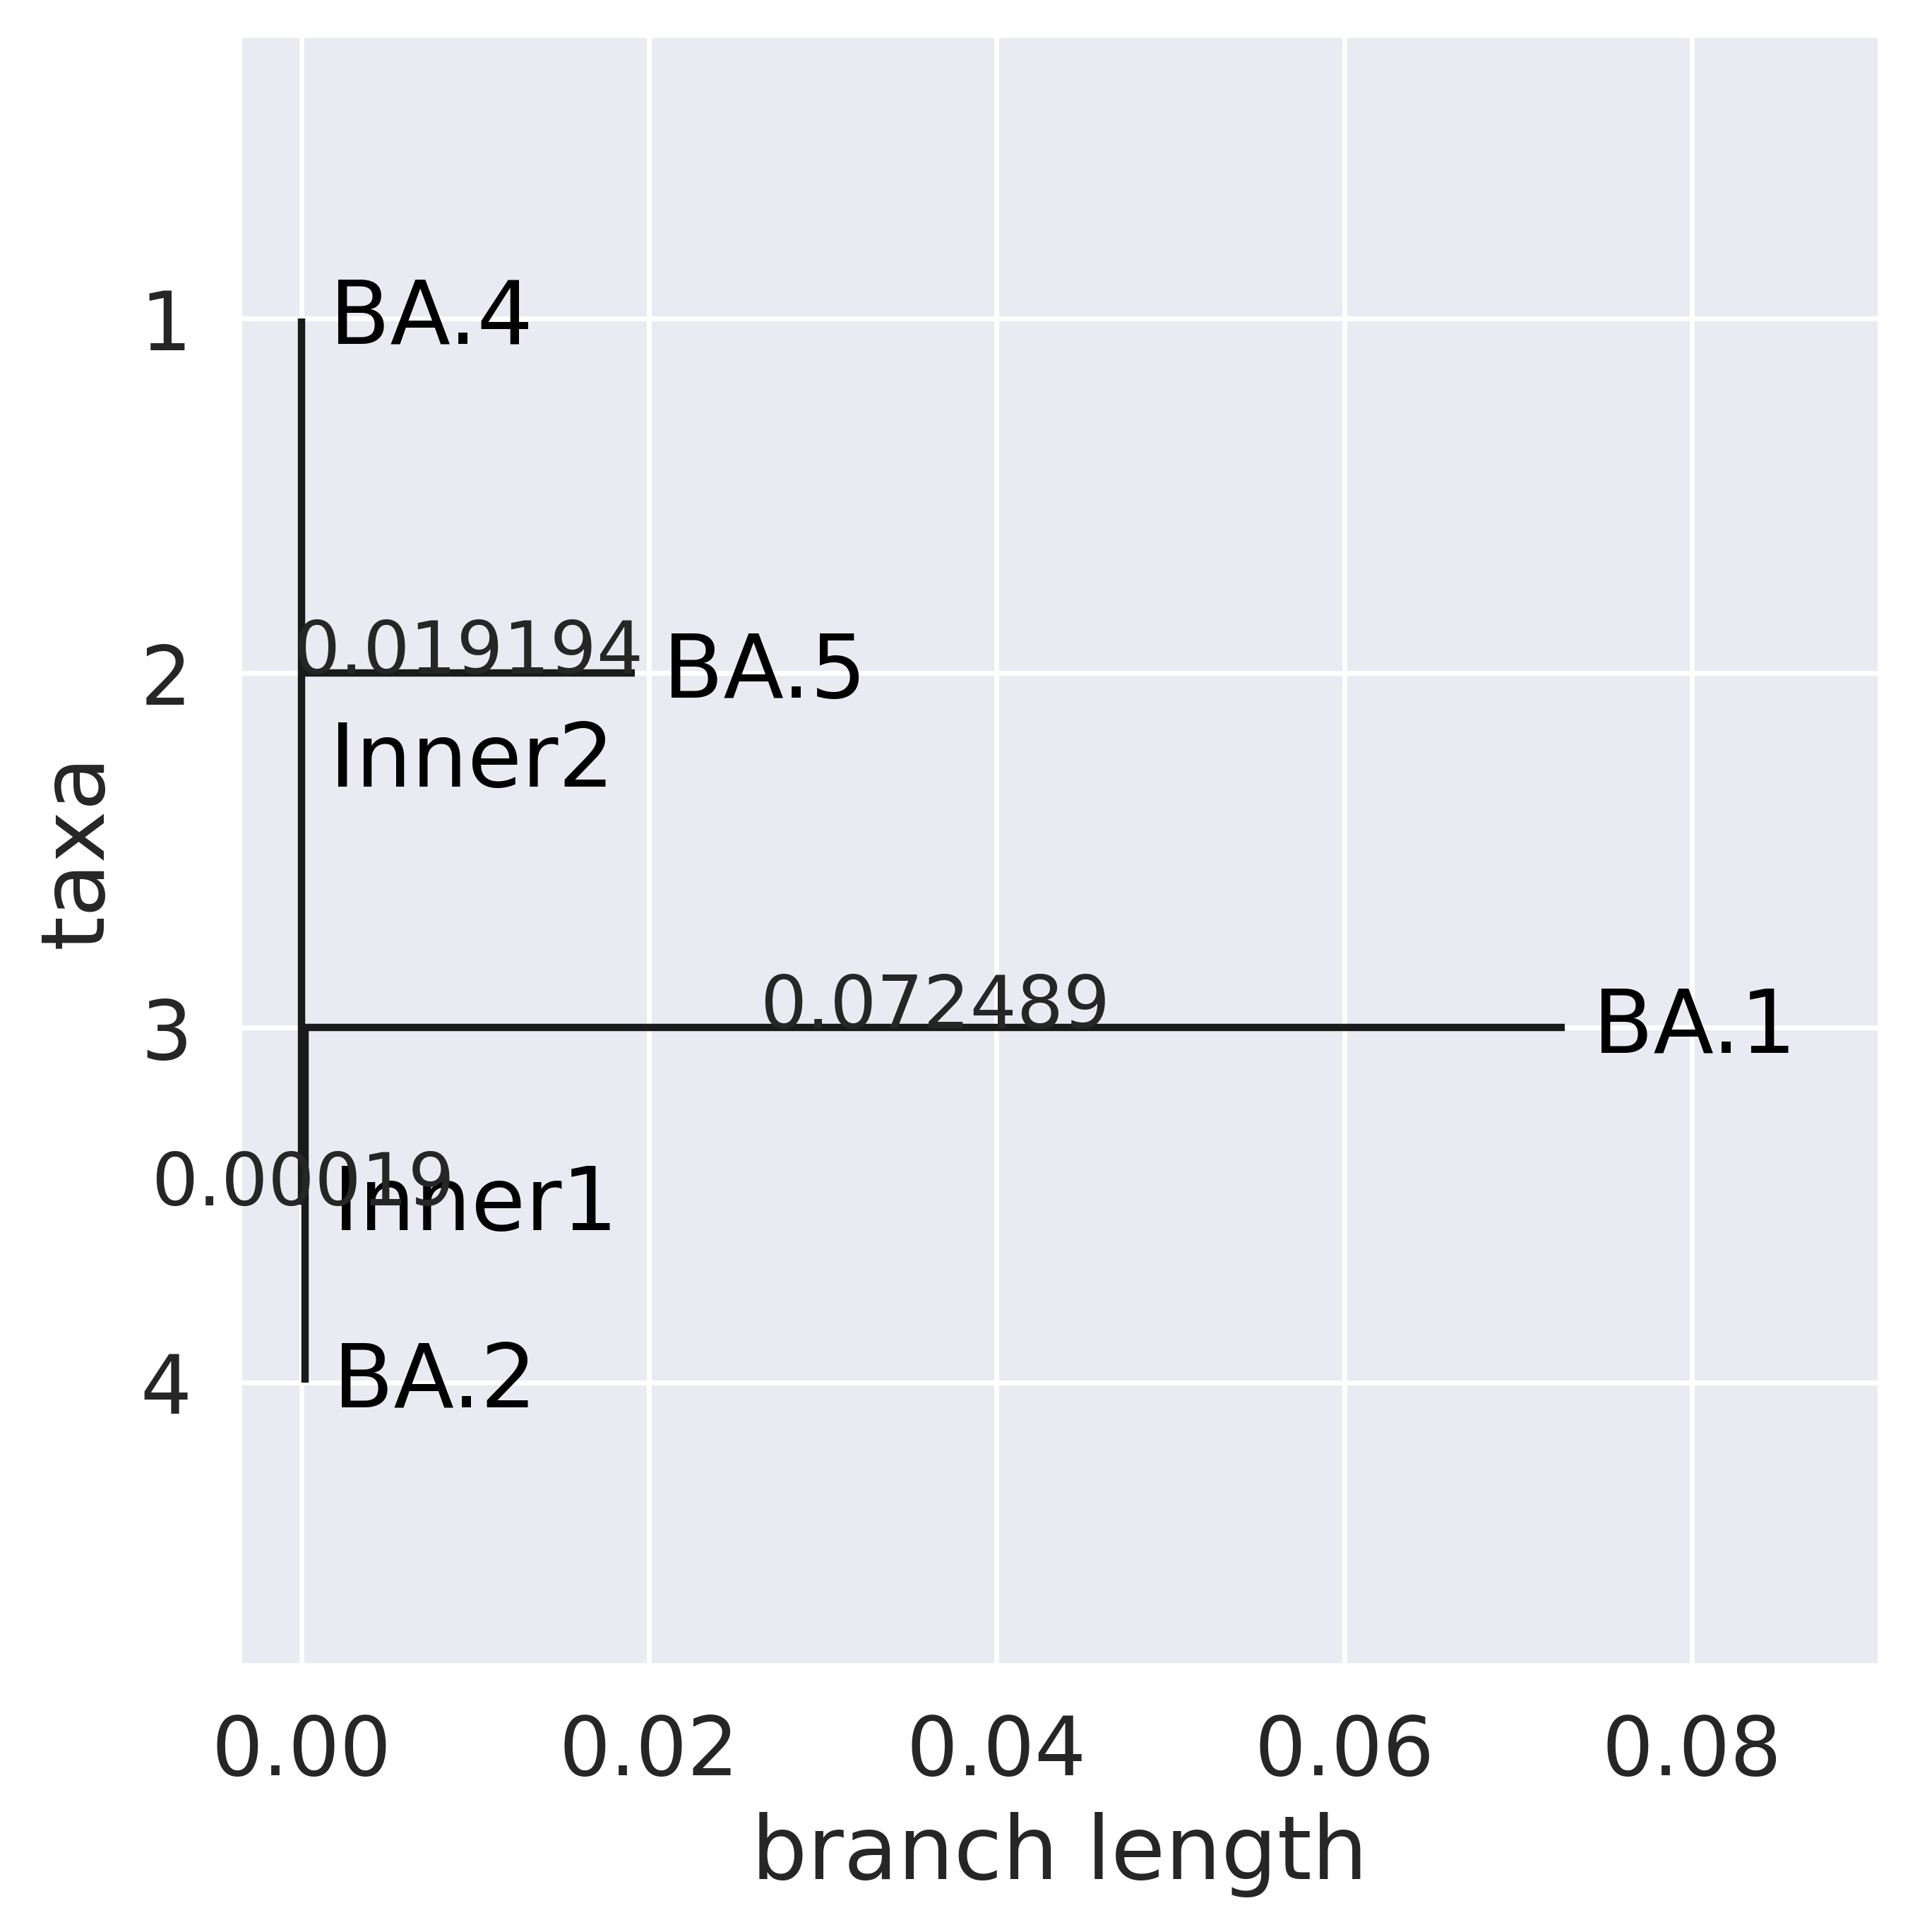

<Figure size 640x480 with 0 Axes>

In [47]:
create_nj_tree("/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/North America_combined_distance_matrix_for_omicron_sublineages.csv", 'North America')

In [33]:
# Phylo.draw_ascii(tree)